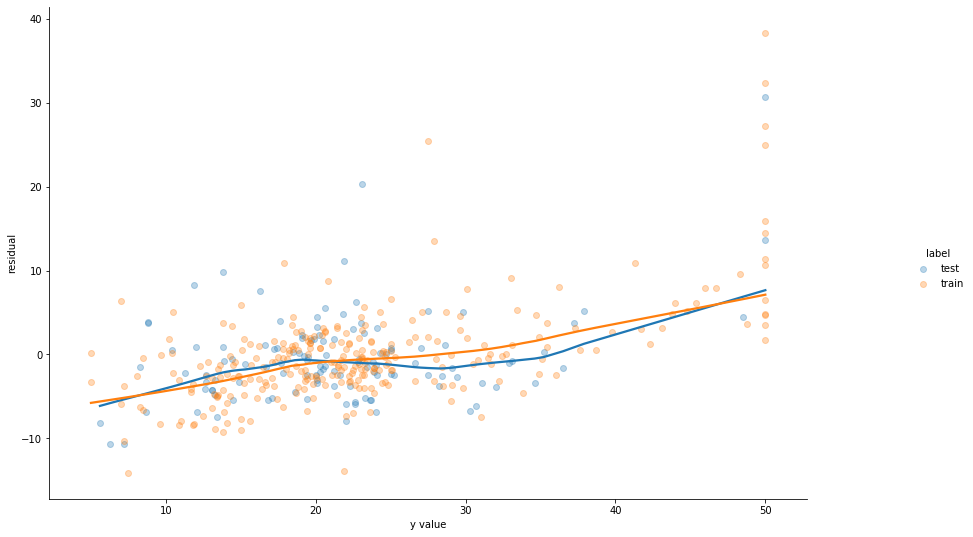

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


df_boston = pd.read_csv("C:\\MyWork\\MyLearning\\ML\\Files\\DataSet\\boston_train.csv")

X = df_boston.drop(columns = ['MEDV'],axis = 1)
y = df_boston['MEDV']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

model = Ridge().fit(X_train,y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

residuals_test = pd.DataFrame({'y value': y_test, 'residual': y_test - y_pred_test,'label' : "test"})

residuals_train = pd.DataFrame({'y value': y_train, 'residual': y_train - y_pred_train,'label' : "train"})

residuals = pd.concat([residuals_test, residuals_train])

lm = sns.lmplot(x = 'y value', y = 'residual',hue = 'label', data = residuals, lowess = True,scatter_kws={"alpha": 0.3})

lm.fig.set_size_inches(15,8)